#  Histogrammes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Graphiques en batons

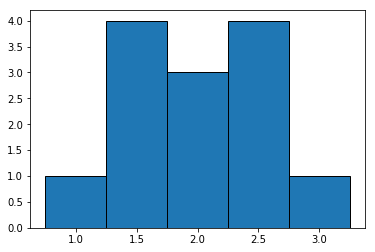

In [2]:
x= [1,1.5,2,2.5,3]
y= [1,4,3,4,1]

""" Par défaut  width=0.8, ce qui ne ferait pas joli ici"""
plt.bar(x,y,edgecolor="k",width=0.5); # "k" c'est black


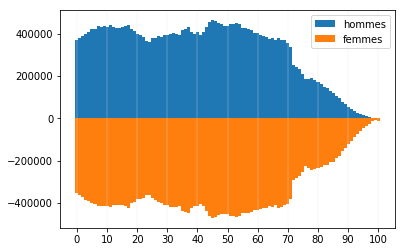

In [3]:
""" Population totale par sexe et âge au 1er janvier 2018, France. source:
https://www.insee.fr/fr/statistiques/fichier/1892086/pop-totale-france.xls """
nb_hommes=[370264,380786,390091,398757,409096,419458,422341,433633,433293,435936,432382,439050,429300,427923,426042,428943,436599,442760,420335,411745,397771,394287,384071,365958,361467,378875,380348,386998,386152,391032,392666,397890,400708,396839,392953,417916,422120,429147,406565,399665,406674,394569,405691,428904,452528,462957,459928,451838,443890,438042,436591,445267,446241,448156,443106,425952,424946,421198,414831,404537,400466,395119,387700,385660,374649,378923,368702,381299,370877,367734,357172,334517,249885,240416,230819,211303,184231,186016,189134,179799,169183,162468,149256,142187,126683,119777,106150,94411,76897,65760,54174,43318,35138,26429,19424,14138,10396,7400,2994,1612,2929,]
nb_femmes=[354226,363749,373574,386477,389867,398597,405611,415679,412153,415631,413237,420649,411513,409866,407270,408649,416111,421402,398604,394150,380429,381718,374299,363324,360271,378034,385787,396563,401533,408101,410675,420196,419362,418329,413567,437539,440858,446720,423369,413791,414315,405569,414926,435625,461600,470512,467329,459041,453968,453315,449798,459334,459223,465447,461150,445813,446626,446154,444025,434265,433063,429825,425865,424456,416053,420938,410389,425522,417056,411404,404106,382498,289497,281703,273366,251816,224905,234778,243629,239419,233198,231156,222866,220997,205946,204422,188772,178310,153484,139112,120327,105685,90293,73890,60007,48181,36624,27518,11907,7042,13945,]
nb_femmes=-np.array(nb_femmes)

ages=range(0,len(nb_hommes))


plt.bar(ages,nb_hommes,width=1,label="hommes")
plt.bar(ages,nb_femmes,width=1,label="femmes")
xticks=np.arange(0,101,10)
plt.xticks(xticks)
for x in xticks: plt.axvline(x,color="0.9",linewidth=0.3)
plt.legend();




***Exo:*** changez les abscisses pour faire apparaitre les années de naissances. Essayez de justifier les trous et les renflements dans la pyramide des âges. 

***Exo:*** Expliquez l'anomalie à l'extrémité droite de la pyramide des âges. 

## Histogrammes



Considérons maintenant un échantillon c.à.d un ensemble de nombre. Dans la plupart des cas les échantillons sont construit:

* soit à partir de simulation successive de v.a (ex: v.a gaussienne)
* soit à partir d'observations (ex: tailles des gens dans la rue)

Dresser l'histogramme d'un échantillon consiste à découper les réel en sous-interavalles, puis d'afficher des batons qui ont pour base ces sous-intervallse, et comme hauteur le nombre d'élément de l'échantillon contenu dans chaque sous-intervalles. 


### Découpage automatique

Ci-dessous, `bins=n` signigie que l'on découpe l'intervalle `[min(X),max(X)]` en n sous-intervalles.

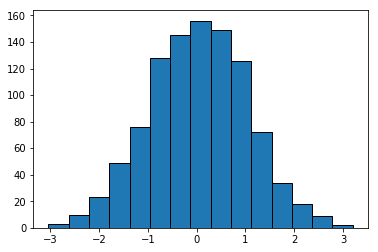

In [4]:
"""l'échantillon à observer"""
X=np.random.normal(0,1,size=1000)
plt.hist(X,bins=15,edgecolor="k");

### Récupérer les valeurs numériques

Les fonctions `plt.hist()` et `np.histogram()` (idem mais sans affichage) permettent aussi de récupérer des valeurs numériques.

hauteur des batons
 [ 36. 253. 450. 232.  29.]
découpage
 [-3.03749776 -1.79027834 -0.54305892  0.7041605   1.95137992  3.19859934]
hauteur des batons
 [ 36 253 450 232  29]
découpage
 [-3.03749776 -1.79027834 -0.54305892  0.7041605   1.95137992  3.19859934]


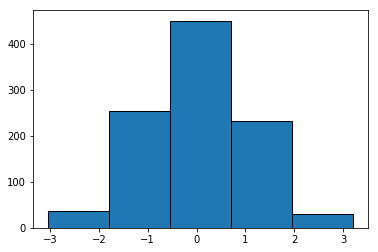

In [7]:
a=plt.hist(X,bins=5,edgecolor="k")
print("hauteur des batons\n",a[0])
print("découpage\n",a[1])
b=np.histogram(X,bins=5)
print("hauteur des batons\n",b[0])
print("découpage\n",b[1])    

### Découpage à la main

Mais parfois il est préférable de préciser nous même les sous-intervalles (=la base des batons)

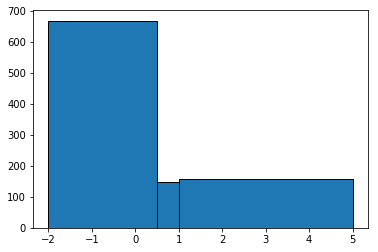

In [6]:
X=np.random.normal(0,1,size=1000)
plt.hist(X, bins=[-2,0.5,1,5],edgecolor="k"); #un choix particulièrement idiot de bins

### Histogramme de loi discrète

Attention, pour les lois discrètes il faut obligatoirement préciser le découpage.
Pour voir une catastrophe, essayez `bins=11` dans l'histrogramme ci-dessous. Expliquez le phénomène.

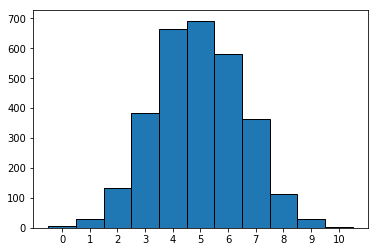

In [8]:
n=10
X=np.random.binomial(n,0.5,size=3000)

"""attention np.arange(0,n+2,1) donne l'intervalle discret [0,n+2[= [0,n+1].
 on lui soustrait ensuite 0.5 pour avoir chaque entier de [0,n] dans un sous-intervalle"""
bins=np.arange(0,n+2,1)-0.5

plt.hist(X,bins=bins,edgecolor="k") 
"""on précise les graduations en x"""
plt.xticks(np.arange(0,n+1,1));

En fait, pour les histogrammes de loi discrète, il est plus simple de ne pas utiliser `plt.hist()`:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([  5,  30, 134, 385, 664, 692, 580, 363, 113,  31,   3]))


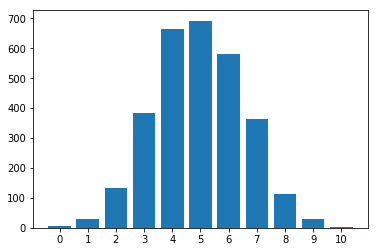

In [12]:
freq=np.unique(X,return_counts=True)
print(freq)
plt.bar(freq[0],freq[1])
plt.xticks(freq[0]);

***A vous:***  Pourquoi $(1\heartsuit)$ la précédure numpy qui compte les occurence d'appelle `np.unique()`? 

### Entre discret et continue. 

Quand une loi discréte a un support très très grand exemple $[0,...,15000]$, on peut faire comme si c'était une loi continue: En divisant ce support en une vingtaine de sous-intervalle, chacun d'entre eux occupera grosso modo le même nombre d'entier. Mais il y a des cas intermédiare comme ci-dessous, où  il faut regrouper proprement les entiers. 

***A vous:*** Améliorer $(2\heartsuit)$  l'histogramme ci-dessous. Aide: deux solutions:

* soit utiliser `plt.hist()` en faisant des bins à la main
* soit utiliser `np.unique()` et `plt.bar()` en quantizant (=en regroupant les valeur) avec la division entière `//`. 

Question subsidière $(4\diamondsuit)$: Montrez qu'une telle loi géomètrique, c'est quasiment une loi exponentielle. 

<BarContainer object of 797 artists>

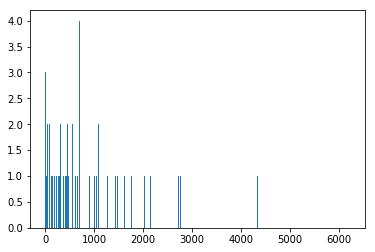

In [18]:
X=np.random.geometric(0.001,size=1000)
freq=np.unique(X,return_counts=True)
plt.bar(freq[0],freq[1]);

### Plusieurs histogrammes

Comparons des lois béta

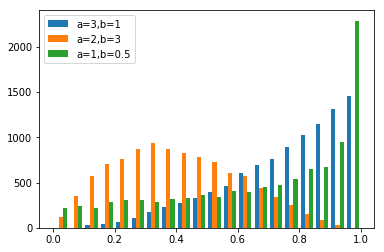

In [8]:
nbData=10000
X1=np.random.beta(3,1,size=nbData)
X2=np.random.beta(2,3,size=nbData)
X3=np.random.beta(1,0.5,size=nbData)

plt.hist([X1,X2,X3],bins=20,label=["a=3,b=1","a=2,b=3","a=1,b=0.5"]);
plt.legend();

La variété des formes possible d'une loi la rend très pratique en modélisation. Choisissez des lois bêta bien choisies (dilatée par une constante), pour modéliser les variables X suivantes:

 * X : quantité chocolat consommée par les français  (sachant que plus on en mange, et plus on a envie d'en manger)
 * X : durée de vie des français 
 * X : durée de vie des grenouilles (forte mortalité infantile)
 
Dressez les histogrammes. Connaissez-vous d'autre loi pour des durées de vie ?

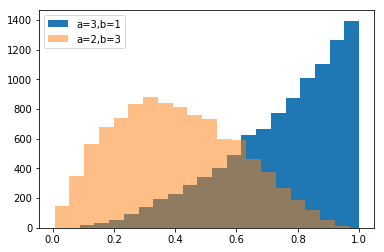

In [13]:
""" on peut aussi superposer les histogrammes en utilisant la transparence (alpha=0.5),
mais au-dela de 2 histogrammes cela devient confus"""
plt.hist(X1,bins=20,label="a=3,b=1")
plt.hist(X2,bins=20,label="a=2,b=3",alpha=0.5);
plt.legend();

## Superposons histogramme et densité 

### La gaussienne

L'option importante pour que l'histogramme se superpose à une densité c'est `density=True`

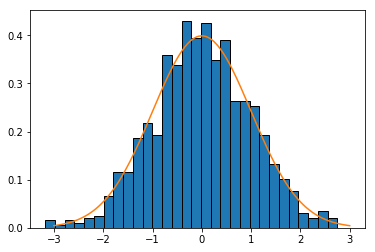

In [61]:
nbSimu=1000
Simu=np.random.normal(size=nbSimu)

"""formule à emmener partout avec soi"""
def gaussian_density(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

plt.hist(Simu,bins=30,density=True,edgecolor="k");

x=np.linspace(-3,3,200)
plt.plot(x, gaussian_density(x));

### Tronquer un histogramme

Parfois on a envit de ne montrer qu'une partie de l'histogramme. `plt.hist()` dispose d'une option `range` qui ignore les valeurs de l'échantillon en dehors du range. Mais malheureusement, `plt.hist()` utlise la normalisation 'naturelle' qui n'est pas compatible avec la superposition avec la densité théorique.  

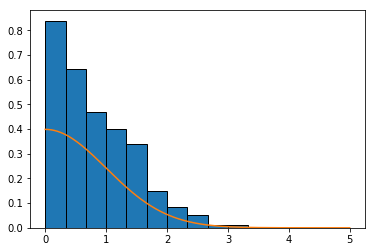

In [62]:
X=np.random.normal(0,1,size=1000)
plt.hist(X,bins=15,range=[0,5],density=True,edgecolor="k");
x=np.linspace(0,5,200)
plt.plot(x, gaussian_density(x));


Il faut donc faire la normalisation à la main, en précisant le poids de chaque observation.

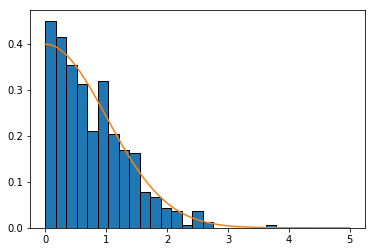

In [63]:
X=np.random.normal(0,1,size=1000)

nb_batons=30
gauche=0
droite=5
bins=np.linspace(gauche,droite,nb_batons)
step=(droite-gauche)/nb_batons
"""Ici une formule à connaitre par coeur (ce qui ne dispense pas de la comprendre)"""
weights=np.ones_like(X)/step/len(X)

plt.hist(X,bins=bins,weights=weights,range=[gauche,droite],edgecolor="k")
x=np.linspace(gauche,droite,200)
plt.plot(x, gaussian_density(x));

### La Cauchy

***Exo:*** Ci-dessous un histogramme très laid d'un échantillon de loi de Cauchy.  Améliorez! 

**Aide:** Plutôt que de recopier le code précédent, créez une petite fonction qui trace un histogramme tronqué. Elle pourrait par exemple avoir comme signature : `hist_tronc(ech,gauche,droite,nb_batons)`

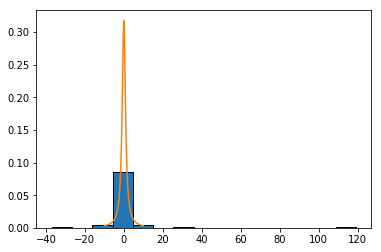

In [64]:

def cauchy_density(x):
    return 1/np.pi/(1+x**2)


X=np.random.standard_cauchy(size=200)
plt.hist(X,bins=15,density=True,edgecolor="k");
x=np.linspace(-10,10,200)
plt.plot(x, cauchy_density(x));

###  Une loi log-normale
 
***Exo:*** Que représente une distribution log-normale ? Réponse : c'est la distribution de $f(X)$ avec $f$ ... et $X$ ... Vérifiez votre réponse en superposant histogramme de $f(X)$  à l'histogramme proposé ci-dessous. 

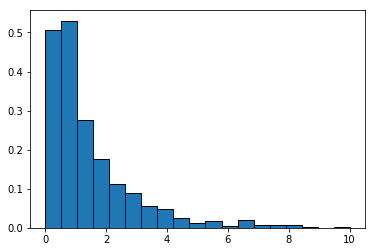

In [65]:
size=1000
X=np.random.lognormal(size=size)
bins=np.linspace(0,10,20)
plt.hist(X, bins=bins, density=True,edgecolor="k");

***Exo suite:***  Réponse de la première partie : la loi log-normale c'est la loi de $\exp(X)$ avec $X \sim Normale(0,1)$. A partir de cette description, vous devriez pouvoir intuitivement comprendre que la densité de la log-normale en 0 vaut ... Ce fait est très mal illustrer par l'histrogramme ci-dessus. Modifiez-le ! 



***Exo fin:*** Complétez le calcul de la densité de la log-normale: Considérons $\phi$ une fonction teste et $X$ une v.a de loi normale.
$$
     \mathbf   E [\phi( \exp(X) )] =  cst  \int \ \phi( e^x ) \  e^{- \frac {1}{2} x^2 }\ dx 
$$
on fait le changement de variable $e^x \to  y$ on trouve ... donc la densité de $\exp(X)$ est ...

Superposez cette densité avec l'histogramme précédent pour valider votre calcul.




### Une loi binomiale

Quelle est le lien entre loi binomiale et loi de bernouilli ?

In [66]:
""" échantillon d'une binomiale """
X=np.random.binomial(n=10,p=0.5,size=100)
np.set_printoptions(linewidth=2000)
print("X:",X)

X: [3 2 4 8 3 7 7 7 5 5 3 7 4 6 4 6 7 4 5 5 6 3 6 5 3 4 7 5 6 6 6 6 7 5 4 4 2 5 5 4 4 4 4 6 3 5 6 7 5 5 3 8 5 4 6 6 5 5 3 5 4 6 7 8 4 5 5 6 3 6 5 3 5 6 7 4 6 4 6 4 8 4 6 4 8 5 5 5 3 5 2 4 6 4 5 6 6 4 4 5]


Dressez l'histogramme de ces simulations. Superposez cet histogramme avec la densité discrète de la loi binomiale. 

On calculera cette densité point par point (sans chercher de package particulier). Vous aurez seulement besoin de la fonction factorielle dispobible dans le package `math`.

Remarque : Il est plus élégant de ne pas relier les points d'une densité discrète. 

In [67]:
import math
print("10!:",math.factorial(10))

10!: 3628800


## Histogramme 2D

Analysez le programme suivant.

* Remplacez les commentaires-questions par de vrais commentaires de programme.
* Quel est l'intérêt de la fonction `test()`
* Que se passe-t-il si on change `T=100` en `T=200` ? 
* Pourquoi l'histogramme final a-t-il un aspect de quadriallage? Aide: c'est mathématique, ce n'est pas un artefact de l'affichage. 
* Si l'on lise ce quadriallage,  à quoi ressemble cet histogramme? En vertu de quel théorème?

In [111]:
def makeTrajectories(T,nbSimu):
    pre_pas=np.random.randint(0, 4, size=[nbSimu,T])
    pas=np.zeros(shape=[nbSimu,T, 2])
    """Qu'est-ce que qu'on fait ici?"""
    pas[pre_pas==0]=[2,1]
    pas[pre_pas==1]=[-1,0]
    pas[pre_pas==2]=[0,1]
    pas[pre_pas==3]=[0,-1]
    """C'est quoi cumsum, pourquoi  axis=1?"""
    return np.cumsum(pas,axis=1)


def test():
    trajectories=makeTrajectories(T=7,nbSimu=3)
    print(trajectories.shape)
    print(trajectories)


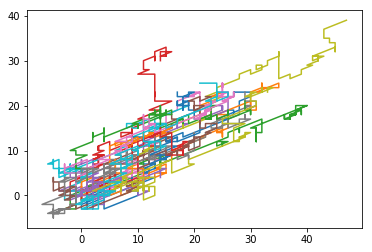

In [112]:
trajectories=makeTrajectories(T=100,nbSimu=20)
for tr in trajectories:
    plt.plot(tr[:,0],tr[:,1])


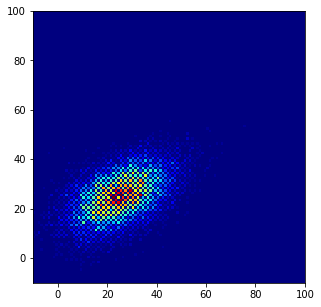

In [114]:
gauche=-10
droite=100

trajectories=makeTrajectories(T=100,nbSimu=10000)
"""C'est quoi ce -1?"""
arrivals=trajectories[:,-1,:]
bins=np.arange(gauche,droite+1,1,dtype=np.float32)
"""Quels sont les 3 arguments de sortie"""
fig,ax=plt.subplots()
fig.set_size_inches(5,5)
ax.set_aspect("equal")
ax.hist2d(arrivals[:,0],arrivals[:,1],bins=[bins,bins],cmap="jet");

## Résumé fonctionnel

Les arguments important de `plt.hist()`:

L'argument obligatoire:

* `x:` les données 


Argument sur le traitement des données :

* `bins`: découpage en sous-intervalles. Soit un nombre, soit une liste.  
* `density=True`: la hauteur des batons est normalisée pour que cela ressemble à une densité
* `range=[gauche,droite]`: les données sont limitées à l'intervale donnée. Attention, l'option `density=True` donne dans ce cas un résultat bizarre. Il faut donc utiliser l'option suivante. 
* `weights`: pondère les données. Pour superposer avec la densité `weights=np.ones_like(X)/step/len(X)` où `step` est la largeur de chaque sous-intervalle. 

Options de présentation

* `orientation:` `"horizontal"` ou  `"vertical"`
* `rwidth`: largeur des batons. Ex: `rwidth=0.5`, ils occupent la moitier des sous-intervalles. 
* `edgecolor`: couleur du pourtour des batons. `"k"` pour black, `"red"` pour red etc. 
* `color`: couleur des batons. 


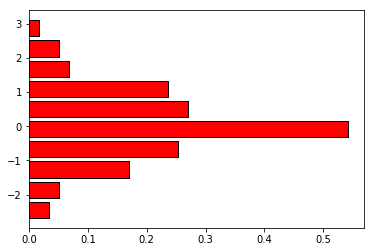

In [52]:
X=np.random.normal(size=100)
plt.hist(X,bins=10,color="red", density=True,rwidth=0.8,orientation="horizontal",edgecolor="k");